<a href="https://colab.research.google.com/github/hannari-python/tutorial/blob/master/family_budget/family_budget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 家計調査データの分析

## データの処理

### 分析に用いるJupyter Notebook

https://github.com/hannari-python/tutorial/blob/master/family_budget/family_budget.ipynb

### データの紹介と閲覧

- [独立行政法人 統計センター 一般用ミクロデータ 平成21年全国消費実態調査 （十大費目）](https://github.com/hannari-python/tutorial/raw/master/data/ippan-microdata/ippan_2009zensho.zip) https://www.nstac.go.jp/services/ippan-microdata.html
- [独立行政法人 統計センター 一般用ミクロデータ 平成21年全国消費実態調査 （詳細品目）](https://github.com/hannari-python/tutorial/raw/master/data/ippan-microdata/ippan_2009zensho_s.zip) https://www.nstac.go.jp/services/ippan-microdata.html
- [独立行政法人 統計センター 一般用ミクロデータ 就業構造基本調査 （平成４年～24年）](https://github.com/hannari-python/tutorial/raw/master/data/ippan-microdata/ippan_shugyou.zip) https://www.nstac.go.jp/services/ippan-microdata.html

### 課題1

https://www.nstac.go.jp/services/ippan-microdata.html

をクリックし
- 一般用ミクロデータの利用規約に目を通しましょう。
- ippan_2009zensho_s.zip の内容をざっと見てみましょう。
- このデータの分析をする場合「何を目的とできそうか」考えてみましょう。

### 我々が設定した目的

1. 支出額の費目毎の分布の違いを見る
2. 支出額からどういう世帯か予測するモデルを作る

#### 目的から外したこと

- 統計解析に基づく...の違いの確からしさ

### データのGoogle Colabへの取得と解凍

次にGoogle Colabの環境内に一般用ミクロデータを取得してみましょう。
一般用ミクロデータの利用規約の「３　第三者への配布について」に、

```
「第三者に一般用ミクロデータを配布する場合には、編集・加工されたデータではなく、当サイトからダウンロードしたフルセットデータで配布してください。」
```

とあります。
これに従いフルセットデータをこのチュートリアルのGitHubのリポジトリにおさめてあります。

https://github.com/hannari-python/tutorial/tree/master/data/ippan-microdata

wgetというLinuxコマンドでGitHubのリポジトリ内のデータをGoogle Colabに取得してみましょう。

`!` の後にLinuxコマンドを書くとそのセルの命令はPythonプログラムではなくLinuxのコマンドとして実行されます。


In [ ]:
!wget https://github.com/hannari-python/tutorial/raw/master/data/ippan-microdata/ippan_2009zensho_s.zip

次に取得したzipファイルを解凍します。
unzip は zip ファイルを解凍する Linux コマンドです。

In [ ]:
!unzip ippan_2009zensho_s.zip

### 課題2

- `ippan_2009zensho_s_dataset.csv` の何行目からが表データのスタートか表計算ソフトで見てみましょう。
- `ippan_2009zensho_s.xls` でデータの定義を表計算ソフトで見てみましょう。

csvのサイズが大きすぎて表計算ソフトで見れない場合は


In [22]:
!iconv -f SJIS ippan_2009zensho_s/ippan_2009zensho_s_dataset.csv | head > head.csv


でcsvの最初の数行だけ別ファイルとして書きだすことができます。

In [26]:
!column -t -s, -n head.csv

※一般用ミクロデータは、公表済みの結果表から作成したミクロデータ形式のデータセットです。                                                                                                                                                                                                                                                                    102〜398・  102〜140  102   120       130       140       170〜213   170        195        203       213         220〜229･   220〜224･  220      221      222      22X         224         225・229  225         229       230〜238    230         231〜235  231       232         233       235       238   240〜299   240         273〜279    273      276       277        279       280〜289  280        281         282        289       290〜299    290         294         296         299         300・319  300       319         320〜339    320・321  320       321         322〜339    322      323        324      325      327      328        330           331        332           333         339         340       360〜

### 分析に必要なPythonパッケージのインストール

次に我々が用いるPythonパッケージのインストールを行いましょう。
我々は dash, jupyter-dash というパッケージを用います。
これらGoogle Colabのデフォルト状態にはインストールされてはいません。

dashはダッシュボードのWebアプリケーションを構築するためのフレームワークタイプのパッケージです。
jupyter-dashはJupyter Notebook上でdashを利用することを可能にするパッケージです。
下記のセルでdashとjupyter-dashがインストールされます。

下記のセルではplotly というパッケージのアップデートも行っています。
plotlyはGoogle Colabのデフォルト状態にインストールされています。
しかし若干古いものがインストールされています。
最新版を使いたいので、下記では`--upgrade`オプションをつけインストールし直しています。

plotlyはオープンソースのインタラクティブなグラフライブラリのPythonパッケージです。


In [ ]:
!pip install dash jupyter_dash
!pip install --upgrade plotly

     |████████████████████████████████| 71kB 2.8MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 1.2MB 7.9MB/s 
     |████████████████████████████████| 3.4MB 15.2MB/s 
     |████████████████████████████████| 194kB 44.1MB/s 
     |████████████████████████████████| 1.8MB 33.1MB/s 
     |████████████████████████████████| 358kB 44.4MB/s 
  Created wheel for dash: filename=dash-1.15.0-cp36-none-any.whl size=80892 sha256=8f7002d4c4f2da8e9aeac8b95151a02bed3cd87e9be16efdec7c6d62cae094bc
  Stored in directory: /root/.cache/pip/wheels/d7/47/47/83e04669b545172324bae30853a71afe2962b733c568a229fe
  Created wheel for flask-compress: filename=Flask_Compress-1.5.0-cp36-none-any.whl size=5272 sha256=ff9c5d9a59b8014d1cdb173ce8fd5e62f35a1824863c89026bcf1fb5b44b0cc0
  Stored in directory: /root/.cache/pip/wheels/f7/e9/e4/5afc286be7c87461375e33152558415dfeb0c8f5af3b50e742
  Created wheel for dash-renderer: filename=dash_renderer-1.7.0-cp36-none-any.whl siz

### pandas を用いたデータの読み込み

次に pandas を用いてデータの読み込みを行います。

pandasはGoogle Colabのデフォルト状態にインストールされています。
pip installを行う必要はありません。

pandasはテーブル形式のデータを簡単かつ直感的に操作できるように「データフレーム」というデータ構造を提供してくれるPythonパッケージです。

下記では `df` がその「データフレーム」になります。

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('ippan_2009zensho_s/ippan_2009zensho_s_dataset.csv', encoding='shift_jis', header=8)

### 課題3
- `encoding` オプションを付けないと`df`がどうなるか確認しましょう
- `header` オプションを付けないと`df`がどうなるか確認しましょう
- `header` オプションの数値を変えると`df`がどうなるか確認しましょう
- `skiprows` というオプションの効果も試してみましょう

### データフレームとは

データフレームとはとりあえず「テーブルデータを保持するためのデータ構造」と考えていただけばOKです。
以降ではデータフレームの便利な機能を紹介します。

`df`とだけ書いたセルをそのまま実行するとデータの内容を見ることができます。
出力結果の最後の行には
`45811 rows × 430 columns`と書かれていることがわかります。


In [ ]:
df

,3City,T_SeJinin,T_SyuJinin,T_JuSyoyu,T_Syuhi,T_Age_5s,T_Age_65,Weight,Y_Income,L_Expenditure,Food,Housing,LFW,Furniture,Clothes,Health,Transport,Education,Recreation,OL_Expenditure,E001,E002,E003,E004,E005,E006,E007,E008,E009,E010,E011,E012,E013,E014,E015,E016,E017,E018,E019,E020,...,E371,E372,E373,E374,E375,E376,E377,E378,E379,E380,E381,E382,E383,E384,E385,E386,E387,E388,E389,E390,E391,E392,E393,E394,E395,E396,E397,E398,E399,E400,E401,E402,E403,E404,E405,E406,E407,E408,E409,E410
0,1,2,1,1,1,1,1,895.266667,3917,201649,47756,16028,9652,6702,8088,726,21546,0,14433,76719,47756,4574,1728,1557,1027,262,3450,2070,555,393,432,3722,2882,785,1286,621,64,126,840,636,...,1320,2186,6448,138,512,535,582,277,4404,2885,65,939,1089,224,538,31,2240,18347,1185,57,5425,244,284,9490,231,95,182,1154,17820,15248,2572,24149,19000,5149,417,3591,1141,576,186,390
1,1,2,1,1,1,1,1,895.266667,6675,166381,34054,7416,26313,17062,6989,7637,20773,0,19048,27089,34054,2813,1019,1050,489,254,1863,905,564,132,261,2432,2112,632,621,697,23,139,320,203,...,231,668,1677,21,258,100,78,38,1182,1581,26,899,189,161,291,14,656,5794,229,10,3980,49,96,804,96,32,95,404,7335,6811,523,8710,7687,1023,239,437,348,282,94,188
2,1,2,1,1,1,1,1,895.266667,6706,259736,84501,1927,10082,6741,5090,11015,53372,0,17289,69719,84501,5004,657,1122,3067,158,7010,4216,718,836,1239,7742,5284,3382,1136,628,43,95,2458,2248,...,4942,3637,8037,190,1210,1606,423,557,4050,8032,124,3204,3350,316,1007,30,1096,20994,1447,40,4398,497,258,9418,295,75,121,4445,9115,8095,1021,11933,7405,4529,1166,2705,658,429,183,246
3,1,2,1,1,1,1,1,895.266667,2790,114511,41664,730,22358,5413,1205,5049,17411,0,8605,12077,41664,4372,1785,1474,910,202,3680,2713,363,255,349,3093,2512,925,828,565,45,149,581,383,...,306,113,2073,36,116,202,109,56,1554,487,18,116,147,45,146,14,182,1661,45,3,157,349,63,667,34,6,24,314,2692,2291,401,4136,2644,1492,69,977,445,205,55,151
4,1,2,1,1,1,1,1,895.266667,2577,193505,56981,3779,28747,4812,4243,751,16435,0,38231,39527,56981,4957,1463,1463,1763,268,4712,3181,558,413,560,4644,3726,1310,1682,518,87,129,919,637,...,842,699,7654,46,160,131,612,93,6613,1780,7,643,870,170,82,8,1116,4768,280,22,2000,164,50,1347,17,96,133,660,5131,3859,1272,16907,4840,12068,699,10940,428,445,138,307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45806,0,3,2,2,2,0,2,552.266667,4398,216774,46169,39809,32508,2896,4203,18778,21739,30,4315,46326,46169,5207,2668,1391,913,235,4929,3086,810,515,518,3851,3055,1001,1263,607,64,119,797,604,...,1022,1163,3508,82,243,280,362,165,2376,1196,40,576,276,67,193,45,1122,12331,1560,291,728,1149,292,6481,243,48,904,634,10563,7368,3194,12858,10883,1975,175,1076,724,1817,957,860
45807,0,3,2,2,2,0,2,552.266667,4844,165978,52670,37839,25403,3532,2293,7016,5022,8,12656,19540,52670,5932,3008,1602,1051,271,5653,3556,927,578,593,4410,3527,1164,1477,680,71,134,883,669,...,408,335,1003,43,200,128,150,76,406,527,19,231,172,20,68,16,516,3927,727,82,125,888,81,1493,115,18,191,208,6634,5082,1552,5104,4120,984,89,523,372,769,363,406
45808,0,3,2,2,2,0,2,552.266667,4630,244064,53784,76871,18196,17747,3308,13499,27705,25,4309,28619,53784,6033,3086,1614,1052,280,5761,3633,932,596,599,4503,3581,1184,1485,700,75,138,922,707,...,626,757,2547,41,121,227,423,104,1630,936,26,282,295,38,266,29,402,6524,847,117,300,812,186,3022,187,38,608,408,6198,3433,2765,8804,7553,1251,190,699,362,1431,973,457
45809,0,3,2,2,2,0,2,552.266667,6738,399003,123080,38810,19711,2816,5666,21831,23914,28,58844,104302,123080,13423,6772,3770,2247,634,13315,8362,2196,1353,1405,10379,8271,2713,3424,1644,174,316,2108,1603,...,2179,2480,7502,198,515,597,772,353,5066,2641,85,1228,606,119,508,95,2025,26762,3328,817,1364,3160,624,13367,517,102,1928,1554,27466,16321,11145

### データフレームの列の選択

430列(変数)ある列から、細かい分類の支出情報の列などを取り除いてみましょう。
`df` のうち `Food`から`OL_Expenditure`までの列を選択し、支出費目の内大きな分類(10大分類)の列だけにしてみましょう。
そのためにはデータフレームの `loc` メソッドを使います。

In [ ]:
exp10 = df.loc[:, 'Food':'OL_Expenditure']
exp10

,Food,Housing,LFW,Furniture,Clothes,Health,Transport,Education,Recreation,OL_Expenditure
0,47756,16028,9652,6702,8088,726,21546,0,14433,76719
1,34054,7416,26313,17062,6989,7637,20773,0,19048,27089
2,84501,1927,10082,6741,5090,11015,53372,0,17289,69719
3,41664,730,22358,5413,1205,5049,17411,0,8605,12077
4,56981,3779,28747,4812,4243,751,16435,0,38231,39527
...,...,...,...,...,...,...,...,...,...,...
45806,46169,39809,32508,2896,4203,18778,21739,30,4315,46326
45807,52670,37839,25403,3532,2293,7016,5022,8,12656,19540
45808,53784,76871,18196,17747,3308,13499,27705,25,4309,28619
45809,123080,38810,19711,2816,5666,21831,23914,28,58844,104302


### [記述統計量(英: descriptive statistics value)](https://ja.wikipedia.org/wiki/%E8%A6%81%E7%B4%84%E7%B5%B1%E8%A8%88%E9%87%8F) の確認

次にデータフレームの列をフィルタした後は各列のデータの平均値などを見てみましょう。そのような値は記述統計量と呼ばれます。(要約統計量、基本統計量、代表値などとも呼ばれます。)
そのためにはデータフレームの `describe` メソッドを使います。
記述統計量は英語でdescriptive statistics valueなのでメソッド名がdescribeになったと思われます。

### 課題4
- describeの結果の行名が何を示すか https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html を見て確認しましょう

In [ ]:
exp10.describe()

,Food,Housing,LFW,Furniture,Clothes,Health,Transport,Education,Recreation,OL_Expenditure
count,45811.000000,4.581100e+04,45811.000000,45811.000000,45811.000000,45811.000000,4.581100e+04,4.581100e+04,4.581100e+04,4.581100e+04
mean,68740.210364,1.612791e+04,19420.995569,9373.956342,12054.818668,13280.968850,4.469237e+04,1.501489e+04,3.109929e+04,6.856828e+04
std,29209.813101,3.878798e+04,8246.369457,12941.144209,15069.659817,18928.182013,7.738839e+04,4.417047e+04,3.289503e+04,8.456648e+04
min,9737.000000,0.000000e+00,1632.000000,27.000000,64.000000,45.000000,7.800000e+01,0.000000e+00,3.720000e+02,3.450000e+02
25%,48104.500000,6.590000e+02,13589.500000,2877.500000,3893.500000,3849.000000,1.037250e+04,0.000000e+00,1.218200e+04,2.479300e+04
50%,63498.000000,2.877000e+03,17905.000000,5614.000000,7686.000000,7687.000000,2.346500e+04,1.761000e+03,2.170800e+04,4.463400e+04
75%,83502.000000,1.746200e+04,23544.500000,11058.000000,14515.500000,15434.500000,4.876050e+04,1.353500e+04,3.831100e+04,8.090950e+04
max,394347.000000,1.702352e+06,128725.000000,584980.000000,569141.000000,715039.000000,2.306300e+06,2.711758e+06,1.019545e+06,2.133987e+06


この表のままでデータを理解するのは難しいです。
そのため以下から「データの可視化」を行っていきます。
また効率のよい「可視化」のために「ダッシュボード」を作ることも行います。

## データの可視化とダッシュボードの作成

以降ではデータの可視化とダッシュボードの作成を行う方法をお伝えします。

### 記述統計量の可視化

先程の`describe()`のmax,min,percentileといった情報を表現するのに適したグラフがあります。
それは箱ひげ図と呼ばれます。

何はともあれ箱ひげ図を作ってみましょう。
データフレームには`boxplot`というメソッドがあります。

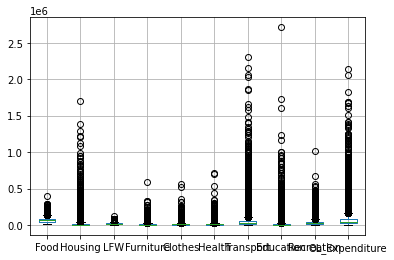

In [ ]:
exp10.boxplot(column=list(exp10.columns))

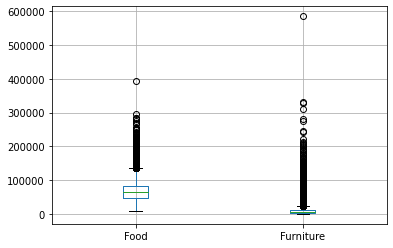

In [ ]:
exp10.boxplot(column=["Food", "Furniture"])

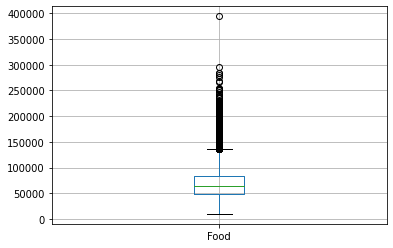

In [ ]:
exp10.boxplot(column=["Food"])

- 箱の下側の線が`describe()`の25%
- 箱の真ん中の線が`describe()`の50%
- 箱の上側の線が`describe()`の75%
- 丸が外れ値

です。外れ値の定義はここでは省略します。
ともあれ実質的なデータの真ん中(75%)からの値(支出額)の外れ方がかなり大きいようです。

### 課題5

- boxplotのキーワード引数に与えるリストの内容を変更してみましょう





### 支出費目毎の金額の分布の比較
箱ひげ図の次にヒストグラムを使って全10大支出費目 (`Food`列から`OL_Expenditure`列) の金額の分布(どの程度の金額を使っている人が何人いるか)を見てみましょう。

これは先程の`boxplot`を`hist`に置換すればできます。


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11bf801630>,
      dtype=object)

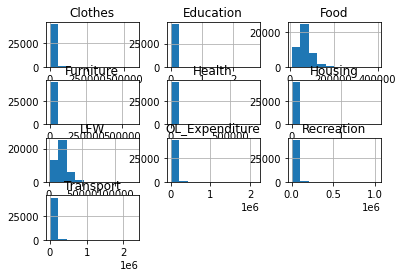

In [ ]:
exp10.hist(column=list(exp10.columns))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11bf723240>,
      dtype=object)

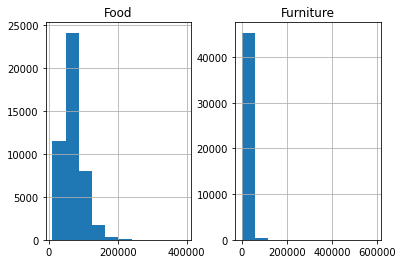

In [ ]:
exp10.hist(column=["Food", "Furniture"])

いまいちな感じです。

このような場合[joypy](https://github.com/sbebo/joypy)というパッケージが便利です。
ということでjoypy を pip でインストールしましょう。


In [ ]:
!pip install joypy

joypyで前述の分布を見るには下記を実行します。
キーワード引数にx軸のレンジ(x_range)と図のサイズ(figsize)を指定しています。


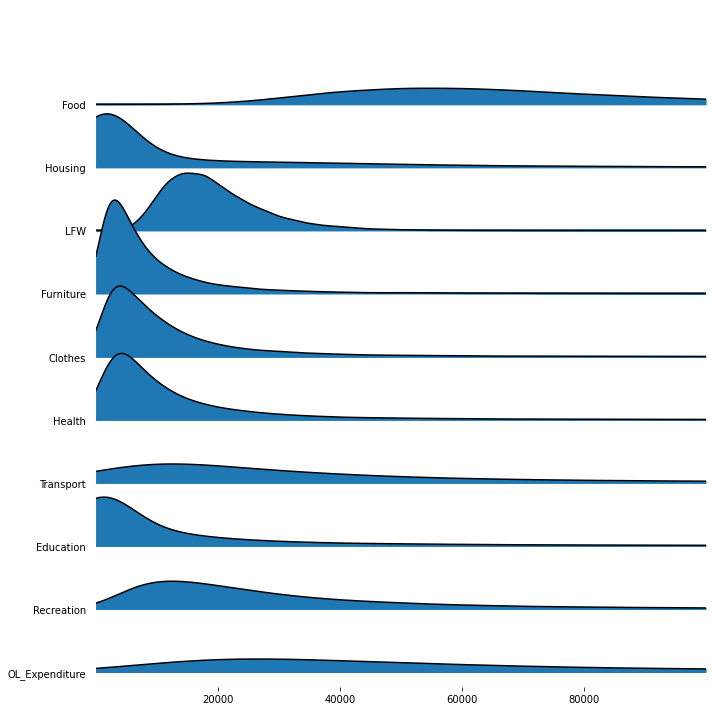

In [ ]:
import joypy
import pandas as pd

fig, axes = joypy.joyplot(exp10, x_range=[0, 100000], figsize=(10,10))

このプロットは一般的にはRidgeline plotと呼ばれます。
Joy Divisionというバンドのある昔のアルバムのジャケ写がそのRidgeline plotに似ていたため俗称としてjoyplotと呼ばれることもあります。
そのためパッケージ名が`joypy`、関数名が`joyplot`となっています。


### 課題6
- exp10 の列のデータとjoypyが作る図の関係を考えてみましょう。
- x_rangeの上限の100000はこれまでの何を参考に設定したでしょうか?
- このプロットからどういう知見が得られるか言語化してみましょう。

### ある支出費目のインタラクティブなヒストグラムを作る

joypyは全体像を見るのには役立ちますが、かなり大まかです。
静的画像なのでズームインして詳しく見るといったこともできません。
そこでplotlyを使ってインタラクティブなヒストグラムを作ってみましょう。

`px.histogram()`のキーワード引数`x`はデータフレーム`exp10`のどの列のデータを使ってヒストグラムを書くかを指定するものになります。

In [ ]:
import plotly.express as px
fig = px.histogram(exp10, x="Food")
fig.show()

次に`x`に`Food`とは別の費目`Housing`を指定してみます。


In [ ]:
fig = px.histogram(exp10, x="Housing")
fig.show()

費目`Food`とは異なり0円のところに山があります。
また金額の最大値が大きいため(そして金額の全範囲を表示しているため)、count数(xの額を使っている人の数)が多いところが詳しく表示できてきません。

### 課題7
- plotlyのズームイン機能を使っていろんな箇所を詳しく見てみましょう。


### 複数の支出費目のヒストグラムを効率的に見るためのダッシュボードの作成

- 先程、2つ費目`Food`と`Housing`のヒストグラムを作る際に変更を行ったのは、`px.histogram()`のキーワード引数`x`の値だけでした。
- その値を毎回手で書きなおすのは面倒です。
- そこで費目をドロップダウンリストなりでGUIのコンポーネントで選択し、表示されるヒストグラムの内容が動的に変わると便利です。
- このような複数のビジュアルコンポーネントが一つの画面にまとめられ、それらが連動するものは「ダッシュボード」と呼ばれています。

以降ではそのダッシュボードをステップ・バイ・ステップで作っていきます。

下記はダッシュボードのベースとなるセルです。
少し長いですが
`app.layout = html.Div(`
より前の行はおまじないなので気にする必要はありません。
重要なのは「`app.layout`にダッシュボードのコンポーネントを加えていく」
ことだけです。

その「加えていく」ことは、dashのhtmlというコンポーネントの中に、別のdashのコンポーネントを入れていくとできます。
ここでは`Graph`というコンポーネントを`html`コンポーネントの中に入れています。
`Graph`コンポーネントのキーワード引数にはID文字列とplotlyのヒストグラムのオブジェクトを設定しています。

In [ ]:
from jupyter_dash import JupyterDash
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
server = app.server

fig = px.histogram(exp10, x="Food")

app.layout = html.Div(
    dcc.Graph(
        id='kakei-hist',
        figure=fig
    )
)


In [ ]:
app.run_server(mode="inline")

<IPython.core.display.Javascript object>

上記でとりあえずヒストグラムを表示することができました。

次にヒストグラムの下の方に費目のドロップダウンリストを追加してみましょう。

このセルでは、前のセルで行ったGraphコンポーネントに続いて、Dropdownコンポーネントをhtmlコンポーネントに追加しています。

Dropdownコンポーネントのキーワード引数`options`は選択する項目をPythonの辞書で表したもののリストです。
`value`は`options`に設定する値です。
この場合は「初期値」を設定していることになります。

In [ ]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
server = app.server

fig = px.histogram(exp10, x="Food")

app.layout = html.Div([
    dcc.Graph(
        id='kakei-hist',
        figure=fig
    ),
    dcc.Dropdown(
        id='kakei-dropdown',
        options=[
            {'label': 'Food', 'value': 'Food'},
            {'label': 'Housing', 'value': 'Housing'},
            {'label': 'LFW', 'value': 'LFW'}
        ],
        value='Food'
    )
])

In [ ]:
app.run_server(mode="inline")

<IPython.core.display.Javascript object>

コンポーネントを複数ならべて最低限度のダッシュボードのようなものができました。
ですがまだコンポーネント間の連携は無くドロップダウンリストの選択項目を変更してもヒストグラムは何も変わりません。

そこでドロップダウンリストとヒストグラムを関連付け、連動させる仕組みを次に紹介します。
それは`callback`と呼ばれています。
`callback`を使わないとdashを使う意義はほとんどありません。

その`callback`の書き方もステップ・バイ・ステップで学んでいきましょう。

まずドロップダウンリストで選択された(辞書の)項目の `value` が「単に表示される」だけの `callback` を書いてみましょう。

`callback` は関数です。
関数なので何らかの入力を受け取り、何らかの出力を行います。
dashはその入力元と出力先を前述のコンポーネントとすることを可能にします。

下記のセルではドロップダウンリストで選択されている値を単に文字列としてプリントするだけの`callback`を実装しました。


In [ ]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
server = app.server

app.layout = html.Div([
    dcc.Dropdown(
        id='kakei-dropdown',
        options=[
            {'label': 'Food', 'value': 'Food'},
            {'label': 'Housing', 'value': 'Housing'},
            {'label': 'LFW', 'value': 'LFW'}
        ],
        value='Food'
    ),
    html.Div(id='dd-output-container')
])

@app.callback(
    dash.dependencies.Output('dd-output-container', 'children'),
    [dash.dependencies.Input('kakei-dropdown', 'value')])
def update_output(value):
    return 'You have selected "{}"'.format(value)

In [ ]:
app.run_server(mode="inline")

<IPython.core.display.Javascript object>

確かにドロップダウンリストで選択する項目を変えると、
`You have selected ` の後に表示される文字列が動的に変わることがわかります。

上記の`callback`はドロップダウンリストの情報を、単に文字列を表示するコンポーネントに流していますがこれをヒストグラムのコンポーネントのキーワード引数に流してやるとどうなるでしょうか?

下記のセルを実行してみましょう。

In [ ]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
server = app.server

fig = px.histogram(exp10, x="Food")

app.layout = html.Div([
    dcc.Graph(
        id='kakei-hist',
        figure=fig
    ),
    dcc.Dropdown(
        id='kakei-dropdown',
        options=[
            {'label': 'Food', 'value': 'Food'},
            {'label': 'Housing', 'value': 'Housing'},
            {'label': 'LFW', 'value': 'LFW'}
        ],
        value='Food'
    )
])

@app.callback(
    dash.dependencies.Output('kakei-hist', 'figure'),
    [dash.dependencies.Input('kakei-dropdown', 'value')])
def update_output(value):
    return px.histogram(exp10, x=value)

In [ ]:
app.run_server(mode="inline")

<IPython.core.display.Javascript object>

ドロップダウンリストで選択する項目に応じてヒストグラムが動的に変わります！

以上がダッシュボード作成のエッセンスになります。

### 課題8

- `dcc.Dropdown()` のキーワード引数 `options`のリストにdictionaryを追加して、`Food`, `Housing`, `LFW` 以外の支出費目のヒストグラムも見れるようにしてみましょう


### 一つの図中で複数のヒストグラムを見る

ヒストグラムを動的に切り替えていると一つの図中に複数のヒストグラムを合わせて表示し、比較したくなったのではないでしょうか?

plotlyの `add_trace()` という機能を使うとそれができます。


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=exp10['Food'], name='Food'))
fig.add_trace(go.Histogram(x=exp10['LFW'], name='LFW'))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

### ヒストグラムの系列の追加をダッシュボードで行う

ここまでの知識を組み合わせると、
「前述の`add_trace`の`Food`や`LFW`の箇所をdashの`callback`で動的に変更できるのではないか?」
と思われたのではないでしょうか?

はい、できます。
`Dropdown`には`multi`というキーワード引数があり、これに`True`をセットするとドロップダウンリストから複数の項目を選択し、キーワード引数`value`の値を文字列のリストにすることができます。

そのリストをコールバックの入力とし、先程の`add_trace`にループで追加してできあがったplotlyの図を出力にすればいいわけです。


In [ ]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
server = app.server

multi = go.Figure()

app.layout = html.Div([
    dcc.Graph(
        id='kakei-multi-hist',
        figure=multi
    ),
    dcc.Dropdown(
        id='kakei-multi-dropdown',
        options=[
            {'label': 'Food', 'value': 'Food'},
            {'label': 'Housing', 'value': 'Housing'},
            {'label': 'LFW', 'value': 'LFW'}
        ],
        value=['Food', 'LFW'],
        multi=True
    )
])

@app.callback(
    dash.dependencies.Output('kakei-multi-hist', 'figure'),
    [dash.dependencies.Input('kakei-multi-dropdown', 'value')])
def update_multitrace(value):
    fig = go.Figure()
    for i in value:
        fig.add_trace(go.Histogram(x=exp10[i], name=i))
    fig.update_layout(barmode='overlay')
    fig.update_traces(opacity=0.75)
    return fig


In [ ]:
app.run_server(mode="inline")

<IPython.core.display.Javascript object>

### 課題9
- 上記のセルでわからないところの有無を確認しましょう
- 課題7 同様 `dcc.Dropdown()` のキーワード引数 `options`のリストにdictionaryを追加して、`Food`, `Housing`, `LFW` 以外の支出費目のヒストグラムも見れるようにしてみましょう

### 人の属性毎の支出費目額の分布の違いを見る

これまでは支出費目毎の金額の分布を見てきました。
データフレーム`df`には課題2で見たように
「人(各行が各人サンプル)」の「属性」の情報も含まれます。
例えば「3大都市に済んでいるか」「そうでないか」などです。

次にその「人の属性」毎に支出費目額がどう違うか見てみましょう。

まず「3大都市に済んでいるか」どうかと10大支出費目以外の列を取り除いたデータフレーム`city`を作ります。

In [ ]:
humantype = df.loc[:, :'OL_Expenditure']
city = humantype.drop(humantype.columns[1:10], axis=1)

In [ ]:
city

,3City,Food,Housing,LFW,Furniture,Clothes,Health,Transport,Education,Recreation,OL_Expenditure
0,1,47756,16028,9652,6702,8088,726,21546,0,14433,76719
1,1,34054,7416,26313,17062,6989,7637,20773,0,19048,27089
2,1,84501,1927,10082,6741,5090,11015,53372,0,17289,69719
3,1,41664,730,22358,5413,1205,5049,17411,0,8605,12077
4,1,56981,3779,28747,4812,4243,751,16435,0,38231,39527
...,...,...,...,...,...,...,...,...,...,...,...
45806,0,46169,39809,32508,2896,4203,18778,21739,30,4315,46326
45807,0,52670,37839,25403,3532,2293,7016,5022,8,12656,19540
45808,0,53784,76871,18196,17747,3308,13499,27705,25,4309,28619
45809,0,123080,38810,19711,2816,5666,21831,23914,28,58844,104302


次に「3大都市に済んでいるか」の[1,0]のラベル情報を["3City", "other"]に置換します。

In [ ]:
city['3City'] = city['3City'].replace([1, 0], ["3City", "other"])

そして再びjoypyでjoyplotを描きます。
`by`というキーワード引数にデータフレーム`city`の列名を設定するとその列のラベル情報毎のjoyplotを作ってくれます。

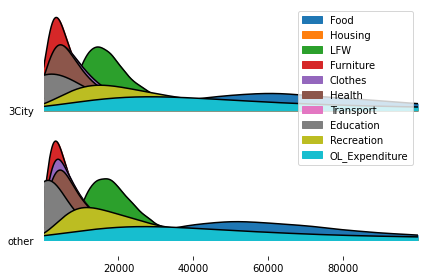

In [ ]:
import joypy
fig, axes = joypy.joyplot(city, by="3City", x_range=[0, 100000], legend=True)

最後に「3大都市に済んでいるか」どうかの2系列で `Food` の支出のヒストグラムがどう違うかも一つの図中で見てみましょう。

In [ ]:
city3 = city[city["3City"]=="3City"]

In [ ]:
city3

,3City,Food,Housing,LFW,Furniture,Clothes,Health,Transport,Education,Recreation,OL_Expenditure
0,3City,47756,16028,9652,6702,8088,726,21546,0,14433,76719
1,3City,34054,7416,26313,17062,6989,7637,20773,0,19048,27089
2,3City,84501,1927,10082,6741,5090,11015,53372,0,17289,69719
3,3City,41664,730,22358,5413,1205,5049,17411,0,8605,12077
4,3City,56981,3779,28747,4812,4243,751,16435,0,38231,39527
...,...,...,...,...,...,...,...,...,...,...,...
18345,3City,61774,26527,14664,1823,4840,7787,1830,0,4331,7311
18346,3City,92222,72412,74346,3670,4345,13058,33555,0,14751,78634
18347,3City,47394,52022,25936,5384,2998,32654,13168,0,25325,1954
18348,3City,85804,23771,51421,9171,1660,2672,15981,0,19116,40749


In [ ]:
city_other = city[city["3City"]=="other"]

In [ ]:
city_other

,3City,Food,Housing,LFW,Furniture,Clothes,Health,Transport,Education,Recreation,OL_Expenditure
18350,other,33007,221,13532,13996,4116,12309,49244,0,23609,505730
18351,other,29133,589,18349,3624,7726,863,45271,0,28709,99614
18352,other,49758,640,11491,9522,2911,1133,53521,0,12573,17443
18353,other,45726,4168,8767,9317,4763,2377,28040,0,41300,567909
18354,other,105865,303,16267,22594,11302,10494,43257,0,113424,1515968
...,...,...,...,...,...,...,...,...,...,...,...
45806,other,46169,39809,32508,2896,4203,18778,21739,30,4315,46326
45807,other,52670,37839,25403,3532,2293,7016,5022,8,12656,19540
45808,other,53784,76871,18196,17747,3308,13499,27705,25,4309,28619
45809,other,123080,38810,19711,2816,5666,21831,23914,28,58844,104302


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Histogram(
    x=city3["Food"],
    bingroup=5000))

fig.add_trace(go.Histogram(
    x=city_other["Food"],
    bingroup=5000))

fig.update_layout(
    barmode="overlay",
    bargap=0.1)

fig.update_traces(opacity=0.75)
fig.show()

### 課題10

- この次にどういう発展をさせたダッシュボードを作ることができるか考えてみましょう

それができたら是非[このチュートリアルのリポジトリ](https://github.com/hannari-python/tutorial)にプルリクエストを送ってください。

以上で「データの可視化とダッシュボードの作成」は終了です！


## 機械学習：2クラス分類

各サンプル（データフレームの行、世帯）の家計の情報から三大都市圏に住んでいるかどうかを予測する問題を考えます。今回の問題は、貿易収支データの場合と異なり、教師あり学習となります。教師あり学習では説明変数（家計の情報）から目的変数（三大都市圏に住んでいるかどうか）を予測します。

手順の大まかな流れは以下の通りです。最初に、前処理でデータフレームの中から必要な情報を取り出し、numpy配列に変換します。教師なし学習の場合と異なり、説明変数と目的変数の二種類のデータが必要です。次にデータを訓練データとテストデータに分割します。訓練データは分類器の訓練に使用し、テストデータは訓練データに含まれない未知のデータに対する分類精度を評価するために使用します。最後に、分割したデータに対して、scikit-learnに実装されている教師あり学習のアルゴリズムを適用します。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix

### 前処理

最初に目的変数を取得します。これはデータフレームの属性`value`に含まれます。データフレームの行に対応する世帯が三大都市圏にある場合は1、そうでなければ0となります。

In [ ]:
y = df["3City"].values
print(type(y), y.shape)
print(np.unique(y))

<class 'numpy.ndarray'> (45811,)
[0 1]


三大都市圏のサンプル数の比率は40%です。今はニクラス分類問題を考えているので、ランダムに予測をしても40%の確率で正解します。

In [ ]:
np.sum(y == 1) / len(y)

0.4005588177511951

説明変数としてデータフレームに含まれる収入と支出の情報を使用します。説明変数の数は12です。

In [ ]:
X = df.loc[:, "Y_Income":"OL_Expenditure"].to_numpy()
type(X), X.shape

(numpy.ndarray, (45811, 12))

データを訓練用とテスト用にランダムに分割します。scikit-learnの関数`train_test_split()`を使用します。ここではテストデータの割合を33%（訓練データの割合が66%）とします。`random_state`は乱数のシードで、明示的に指定することで毎回同じ分割が得られます。

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 分類器の訓練と評価

前処理が完了したので、分類器の訓練と評価を行います。最初に線形[SVM](https://en.wikipedia.org/wiki/Support_vector_machine)を用いた例を示します。この分類器はその名の通り線形の分類器で、説明変数のデータ空間（12次元）を分割する超平面を訓練データに基づいて計算します。


#### 線形SVM

線形SVMはクラス`LinearSVC`に実装されています。貿易データのクラスタリングでは`fit_predict()`というメソッドを使用しました。ここでは`fit()`というメソッドを使用します。引数は訓練データの説明変数と目的変数です。これにより、訓練データに対してクラスを出来るだけ高い精度で予測するような分類器のパラメータを推定します。 

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

メソッド`score()`を用いて与えられたデータに対する予測の正答率を計算します。訓練データに対する正答率を計算すると60%程度となります。


In [ ]:
clf.score(X_train, y_train)

0.6032971687355423

テストデータに対する正答率もほぼ同程度となります。

In [ ]:
clf.score(X_test, y_test)

0.600608546103982

個々の世帯に対する予測はメソッド`predict()`で行うことができます。

In [ ]:
print(clf.predict(X_train[:10, :]))
print(y_train[:10])

[0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 1 0 1 0 1 0]


#### 非線形SVM（ガウスカーネル）

非線形SVMはクラス`SVC`に実装されています。デフォルトでは[ガウスカーネル](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)が使用されます。先ほどと同様にメソッド`fit()`によって分類器を訓練します。線形SVMと比べて計算に少し時間がかかります。

In [ ]:
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

訓練データとテストデータに対する正答率を確認します。線形SVMと比べてわずかながら正答率が高いことが確認できます。

In [ ]:
print("Score (train): {}".format(clf.score(X_train, y_train)))
print("Score (test): {}".format(clf.score(X_test, y_test)))

Score (train): 0.6255497996285798
Score (test): 0.6158883450191824


#### ハイパーパラメータ

機械学習のアルゴリズムは、アルゴリズム自体の挙動を調整する[ハイパーパラメータ](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning))を持ちます。scikit-learnに実装されている多くのアルゴリズムはコンストラクタの引数でハイパーパラメータを指定できます。クラスタリングの例のクラスタ数もハイパーパラメータの一種です。モデルパラメータ（線形SVMの場合は超平面の重みベクトル、ニューラルネットの場合は結合重み）が訓練データに基づいて決定するのに対し、ハイパーパラメータはユーザが手で与えます。ただし、[ハイパーパラメータ最適化](https://en.wikipedia.org/wiki/Hyperparameter_optimization)という手法を使うとハイパーパラメータも自動的に決定することができます。

クラス`SVC`の代表的なハイパーパラメータとして、正則化パラメータとカーネルの種類があります。以下の説明はscikit-learnのドキュメントの引用です。

* C: float, default=1.0 
  * Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
* kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
  * Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

ハイパーパラメータを変えた場合の実行結果は以下のようになります。

In [ ]:
clf = SVC(C=0.1)
clf.fit(X_train, y_train)
print("Score (train): {}".format(clf.score(X_train, y_train)))
print("Score (test): {}".format(clf.score(X_test, y_test)))

Score (train): 0.6187730101326036
Score (test): 0.6111258102923667


In [ ]:
clf = SVC(C=10.0)
clf.fit(X_train, y_train)
print("Score (train): {}".format(clf.score(X_train, y_train)))
print("Score (test): {}".format(clf.score(X_test, y_test)))

Score (train): 0.6340859479360115
Score (test): 0.6208493186929488


#### スケーリング

ガウスカーネルは各次元のスケール（分散）が同程度の場合にうまく働きます。しかし、今回のデータは12の各次元でスケールが大きく異なります。

In [ ]:
np.std(X_train, axis=0)

array([  3814.94674019, 164546.00487525,  29195.47371209,  37273.15069518,
         8201.1948138 ,  13154.1254912 ,  15169.91447892,  19300.31666009,
        76634.89449254,  42547.98429837,  33047.217095  ,  84903.40973838])

スケールを揃えるために、scikit-learnにはクラス`preprocessing.StandardScaler`が用意されています。このクラスを使うと、各次元のスケールを揃えることができます。

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.std(X_train_scaled, axis=0))
print(np.std(X_test_scaled, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.99662875 1.00707397 1.00145289 1.11857525 1.01649898 0.95001373
 0.97980344 0.94032299 1.02947242 1.11150119 0.98594571 0.98789148]


スケールを揃えたデータに対して非線形SVMを適用します。正答率が向上していることを確認できます。

In [ ]:
clf = SVC()
clf.fit(X_train_scaled, y_train)
print("Score (train): {}".format(clf.score(X_train_scaled, y_train)))
print("Score (test): {}".format(clf.score(X_test_scaled, y_test)))

Score (train): 0.6594337471084613
Score (test): 0.63030824183093


#### その他の分類器

scikit-learnには性能が高い分類器として代表的な[ランダムフォレスト](https://en.wikipedia.org/wiki/Random_forest)や[勾配ブースティング](https://en.wikipedia.org/wiki/Gradient_boosting)も実装されています。以下のようにして使用できます。

In [ ]:
# # RandomForest
# clf = RandomForestClassifier()
# clf.fit(X_train.to_numpy(), y_train)
# print("Score (train): {}".format(clf.score(X_train.to_numpy(), y_train)))
# print("Score (test): {}".format(clf.score(X_test.to_numpy(), y_test)))

### 勾配ブースティング

In [ ]:
# # Gradient boosting
# clf = GradientBoostingClassifier()
# clf.fit(X_train.to_numpy(), y_train)
# print("Score (train): {}".format(clf.score(X_train.to_numpy(), y_train)))
# print("Score (test): {}".format(clf.score(X_test.to_numpy(), y_test)))

## 機械学習：多クラス分類

先ほどは2クラスの分類を行いました。今度はより多くのクラスを持つ分類問題として、各世帯の年代を予測する問題を考えます。

### 前処理

先ほどと同様に目的変数を取得します。全部で10クラスあることが確認できます。

In [ ]:
y = df["T_Age_5s"].values
print(type(y), y.shape)
print(np.unique(y))

<class 'numpy.ndarray'> (45811,)
[0 1 2 3 4 5 6 7 8 9]


各クラスのサンプル数を確認します。

In [ ]:
np.histogram(y, bins=np.arange(10))

(array([11466,  1068,  2602,  4008,  4209,  4168,  4523,  5156,  8611]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

比率に直すと次のようになります。

In [ ]:
np.set_printoptions(precision=3)
np.histogram(y, bins=np.arange(10))[0] / len(y)

array([0.25 , 0.023, 0.057, 0.087, 0.092, 0.091, 0.099, 0.113, 0.188])

データを訓練用とテスト用に分割します。

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 予測モデルの訓練と評価

ここでは先ほど用いていたSVMの代わりに勾配ブースティングを用いてクラス分類を行います。基本的な使い方はSVMの場合と全く同じです。

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
print("Score (train): {}".format(clf.score(X_train, y_train)))
print("Score (test): {}".format(clf.score(X_test, y_test)))

Score (train): 0.47027009415827714
Score (test): 0.39879613705516603


クラス分類において、正答率だけでなくどのクラスとどのクラスを間違えやすいかということも重要です。真のクラスと予測クラスの関係を調べるため、scikit-learnには[混同行列](https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2)をプロットする関数が用意されています。

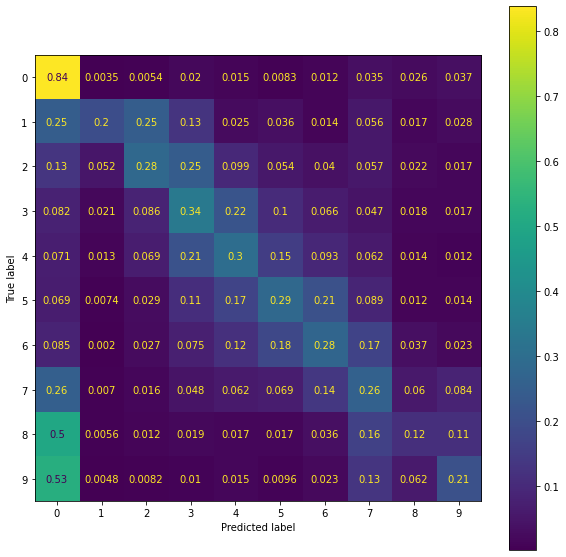

In [ ]:
fig = plt.figure(figsize=(10, 10))
disp = plot_confusion_matrix(clf, X_test, y_test,
                                #  display_labels=class_names,
                                #  cmap=plt.cm.Blues)
                                normalize="true", ax=plt.gca())
plt.show()

上記の結果ではクラス0が高い正答率を示しています。一方、他のクラスの正答率は低いです。このような偏りの原因として、訓練データに含まれるクラス0の世帯数（サンプル数）が他のクラスに比べて多いことが挙げられます。分類器によっては、このようなサンプル数の偏りを補正するハイパーパラメータが用意されている場合があります。SVMの場合、コンストラクタの引数`class_wdight`を設定することで偏りがある程度補正されます。

In [ ]:
clf = SVC(C=10.0, class_weight="balanced")
clf.fit(X_train, y_train)
print("Score (train): {}".format(clf.score(X_train, y_train)))
print("Score (test): {}".format(clf.score(X_test, y_test)))

Score (train): 0.3474733652624377
Score (test): 0.3270935308903294


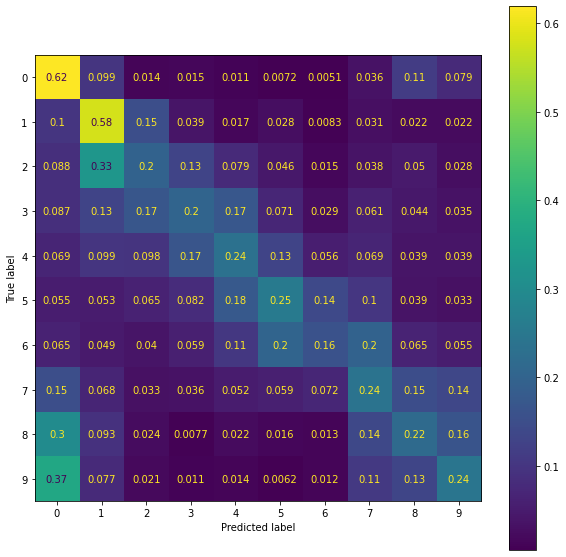

In [ ]:
fig = plt.figure(figsize=(10, 10))
disp = plot_confusion_matrix(clf, X_test, y_test,
                                #  display_labels=class_names,
                                #  cmap=plt.cm.Blues)
                                normalize="true", ax=plt.gca())
plt.show()

### 課題

* ハイパーパラメータを変えて正答率がどのように変わるか確認します。例として非線形（ガウスカーネル）SVMのカーネルのスケールを決める`gamma`は結果に大きく影響します (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)。
* 三大都市圏、世帯の年代以外の指標を目的変数としてみましょう。
* 代表的な収入と支出だけでなく、より多くの特徴量を説明変数に加えてクラス分類を行います。特徴量が増えれば増えるほど、訓練データに対する正答率が増加します。この時、テストデータに対する正答率を合わせて確認することで、[汎化性能と過学習](https://wp.wwu.edu/machinelearning/2017/01/22/generalization-and-overfitting/)について考察してみましょう。